In [1]:
!pip install torch torchvision torchaudio
!pip install ultralytics
!pip install opencv-python-headless


  Using cached torchvision-0.19.0-1-cp39-cp39-win_amd64.whl (1.3 MB)
  Using cached torchaudio-2.4.0-cp39-cp39-win_amd64.whl (2.4 MB)
     ------------------------------------ 869.1/869.1 kB 916.6 kB/s eta 0:00:00
  Using cached py_cpuinfo-9.0.0-py3-none-any.whl (22 kB)


In [2]:
import torch
import cv2
import numpy as np
from PIL import Image
from ultralytics import YOLO
import matplotlib.pyplot as plt

In [8]:
import yaml

# Define your dataset dictionary
dataset_dict = {
    'train': 'D:/Archive (8)/Traffic Dataset/images/train',
    'val': 'D:/Archive (8)/Traffic Dataset/images/val',
    'labels': {
        'train': 'D:/Archive (8)/Traffic Dataset/labels/train',
        'val': 'D:/Archive (8)/Traffic Dataset/labels/val'
    }
}

# Save the dictionary as a YAML file
with open('dataset.yaml', 'w') as file:
    yaml.dump(dataset_dict, file)


PRO TIP  Replace 'model=yolov5l.pt' with new 'model=yolov5lu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.


0: 448x640 21 cars, 1 truck, 651.6ms
Speed: 10.1ms preprocess, 651.6ms inference, 8.0ms postprocess per image at shape (1, 3, 448, 640)


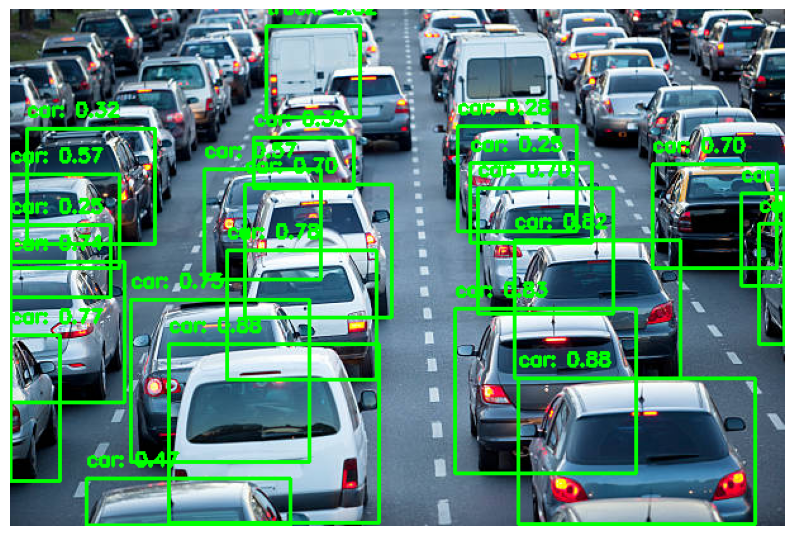

In [2]:


# Load the YOLO model
model = YOLO('yolov5l.pt')   # Replace 'yolov5s' with your desired model

# Function to predict traffic
def predict_traffic(image_path):
    img = Image.open(image_path)

    # Run inference
    results = model(img)

    # Extract detections
    detections = results[0].boxes.xyxy.cpu().numpy(), results[0].boxes.conf.cpu().numpy(), results[0].boxes.cls.cpu().numpy()

    return detections

# Function to draw bounding boxes and labels
def draw_boxes(image, detections):
    boxes, confidences, classes = detections
    for i in range(len(boxes)):
        x1, y1, x2, y2 = boxes[i]
        conf = confidences[i]
        cls = int(classes[i])
        cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
        cv2.putText(image, f"{model.names[cls]}: {conf:.2f}", (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Load and process the image
image_path = "D:\PROJECTS\Traffic Managment System\Smart-Adaptive-Traffic-Management-System\photo.jpg"  # Replace with your image path
detections = predict_traffic(image_path)

# Load the image for visualization
img = cv2.imread(image_path)

# Draw bounding boxes and labels
draw_boxes(img, detections)

# Convert BGR image to RGB for plotting
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image in Jupyter Notebook
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()



0: 384x640 1 person, 24 cars, 5 trucks, 597.7ms
Speed: 8.0ms preprocess, 597.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


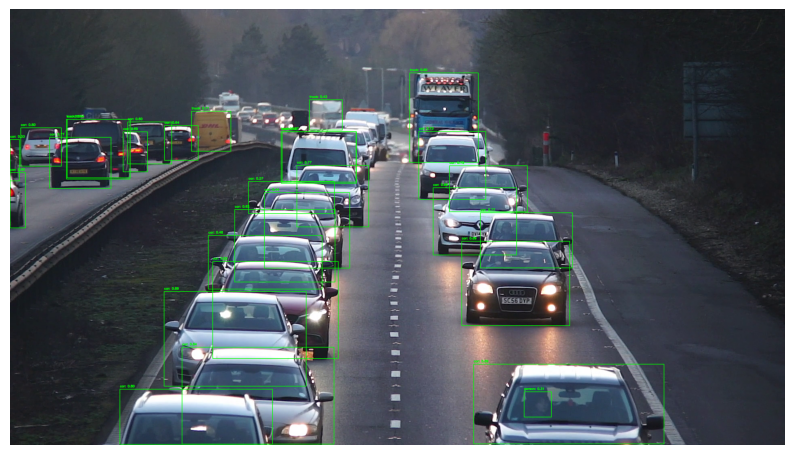

In [5]:
import torch
import cv2
import numpy as np
from PIL import Image
from ultralytics import YOLO
import matplotlib.pyplot as plt
from IPython.display import clear_output

# Load the YOLO model
model = YOLO('yolov5l.pt')  # Use the correct model path

# Function to process video
def process_video(video_path, output_path, display=False):
    # Open the video file
    cap = cv2.VideoCapture(video_path)

    # Get video information
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))

    # Define the codec and create VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Run YOLO model on the frame
        results = model(frame)

        # Extract detections
        detections = results[0].boxes.xyxy.cpu().numpy(), results[0].boxes.conf.cpu().numpy(), results[0].boxes.cls.cpu().numpy()

        # Draw bounding boxes and labels
        boxes, confidences, classes = detections
        for i in range(len(boxes)):
            x1, y1, x2, y2 = boxes[i]
            conf = confidences[i]
            cls = int(classes[i])
            cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
            cv2.putText(frame, f"{model.names[cls]}: {conf:.2f}", (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        # Write the processed frame to the output video
        out.write(frame)

        # Display the frame using Matplotlib (if display is True)
        if display:
            # Convert BGR (OpenCV format) to RGB (Matplotlib format)
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            plt.figure(figsize=(10, 6))
            plt.imshow(frame_rgb)
            plt.axis('off')
            plt.show()
            
            # Clear the output to simulate a video display
            clear_output(wait=True)

    # Release the video capture and writer objects
    cap.release()
    out.release()

# Example usage
video_path = "C:\\Users\\vansh\\Downloads\\2103099-uhd_3840_2160_30fps.mp4"  # Replace with your video path
output_path = "C:\\Users\\vansh\\Downloads\\new.mp4"  # Replace with desired output path
process_video(video_path, output_path, display=True)
